In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import pandas_profiling

from numpy import nan
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

#For Plotting 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

### Step 1 : Dataset preparation

#### Loading the botnet_neris botnet data

In [3]:
#Loading the botnet_neris data
botnet_neris = pd.read_csv(r"Dataset\CTU-13-Dataset\1\capture20110810.binetflow")

In [4]:
botnet_neris.head()

StartTime       Dur Proto        SrcAddr Sport    Dir  \
0  2011/08/10 09:46:59.607825  1.026539   tcp  94.44.127.113  1577     ->   
1  2011/08/10 09:47:00.634364  1.009595   tcp  94.44.127.113  1577     ->   
2  2011/08/10 09:47:48.185538  3.056586   tcp   147.32.86.89  4768     ->   
3  2011/08/10 09:47:48.230897  3.111769   tcp   147.32.86.89  4788     ->   
4  2011/08/10 09:47:48.963351  3.083411   tcp   147.32.86.89  4850     ->   

        DstAddr Dport State  sTos  dTos  TotPkts  TotBytes  SrcBytes  \
0  147.32.84.59  6881  S_RA   0.0   0.0        4       276       156   
1  147.32.84.59  6881  S_RA   0.0   0.0        4       276       156   
2   77.75.73.33    80  SR_A   0.0   0.0        3       182       122   
3   77.75.73.33    80  SR_A   0.0   0.0        3       182       122   
4   77.75.73.33    80  SR_A   0.0   0.0        3       182       122   

                                    Label  
0  flow=Background-Established-cmpgw-CVUT  
1  flow=Background-Established-cmpgw-CVUT  
2             flow=Background-TCP-Attempt  
3             flow=Background-TCP-Attempt  
4             flow=Background-TCP-Attempt

In [5]:
botnet_neris.describe()

Dur          sTos          dTos       TotPkts      TotBytes  \
count  2.824636e+06  2.814046e+06  2.629446e+06  2.824636e+06  2.824636e+06   
mean   4.322060e+02  2.786664e-02  4.430591e-04  2.547990e+01  1.929134e+04   
std    9.958423e+02  2.220372e+00  3.332693e-02  3.124788e+03  3.212186e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  6.000000e+01   
25%    3.130000e-04  0.000000e+00  0.000000e+00  2.000000e+00  2.140000e+02   
50%    1.194000e-03  0.000000e+00  0.000000e+00  2.000000e+00  2.610000e+02   
75%    9.012607e+00  0.000000e+00  0.000000e+00  4.000000e+00  5.880000e+02   
max    3.600031e+03  1.920000e+02  3.000000e+00  2.686731e+06  2.689640e+09   

           SrcBytes  
count  2.824636e+06  
mean   4.155290e+03  
std    1.858530e+06  
min    0.000000e+00  
25%    7.800000e+01  
50%    8.300000e+01  
75%    2.610000e+02  
max    2.635366e+09

In [6]:
botnet_neris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824636 entries, 0 to 2824635
Data columns (total 15 columns):
 #   Column     Dtype  
---  ------     -----  
 0   StartTime  object 
 1   Dur        float64
 2   Proto      object 
 3   SrcAddr    object 
 4   Sport      object 
 5   Dir        object 
 6   DstAddr    object 
 7   Dport      object 
 8   State      object 
 9   sTos       float64
 10  dTos       float64
 11  TotPkts    int64  
 12  TotBytes   int64  
 13  SrcBytes   int64  
 14  Label      object 
dtypes: float64(3), int64(3), object(9)
memory usage: 323.3+ MB


#### Loading the Rbot botnet data

In [7]:
#Loading the Rbot data
botnet_rbot = pd.read_csv(r"Dataset\CTU-13-Dataset\3\capture20110812.binetflow")

In [8]:
botnet_rbot.head()

StartTime         Dur Proto          SrcAddr  Sport  \
0  2011/08/12 15:25:56.021112   11.337043   tcp     195.68.34.68  52475   
1  2011/08/12 15:29:25.508940    2.962470   tcp     147.32.86.58   1393   
2  2011/08/12 15:30:21.101931    2.962828   tcp    201.54.33.206   2550   
3  2011/08/12 15:37:08.317877    1.986249   tcp  221.134.221.114   8204   
4  2011/08/12 15:33:53.620500  767.978638   tcp     147.32.84.59  49156   

     Dir        DstAddr  Dport      State  sTos  dTos  TotPkts  TotBytes  \
0     ->  147.32.86.165  12114      SR_SA   0.0   0.0       11       824   
1     ->   77.75.73.156     80       SR_A   0.0   0.0        3       182   
2     ->  147.32.86.110    443       S_RA   0.0   0.0        4       240   
3     ->  147.32.84.189  51413       S_RA   0.0   0.0        4       252   
4     ->    147.32.80.7     80  SRPA_FSPA   0.0   0.0       14      3710   

   SrcBytes                                   Label  
0       606         flow=Background-TCP-Established  
1       122             flow=Background-TCP-Attempt  
2       120             flow=Background-TCP-Attempt  
3       132             flow=Background-TCP-Attempt  
4       774  flow=Background-Established-cmpgw-CVUT

In [9]:
botnet_rbot.describe()

Dur          sTos          dTos       TotPkts      TotBytes  \
count  4.710638e+06  4.603832e+06  4.268271e+06  4.710638e+06  4.710638e+06   
mean   1.779531e+02  1.762069e-01  2.727100e-04  3.560668e+01  2.617864e+04   
std    6.783478e+02  5.775615e+00  2.629716e-02  3.986630e+03  3.411990e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  6.000000e+01   
25%    2.410000e-04  0.000000e+00  0.000000e+00  2.000000e+00  2.080000e+02   
50%    3.620000e-04  0.000000e+00  0.000000e+00  2.000000e+00  2.440000e+02   
75%    3.096770e-01  0.000000e+00  0.000000e+00  4.000000e+00  5.360000e+02   
max    3.600000e+03  1.920000e+02  3.000000e+00  3.841063e+06  3.529904e+09   

           SrcBytes  
count  4.710638e+06  
mean   6.983991e+03  
std    2.239477e+06  
min    0.000000e+00  
25%    7.600000e+01  
50%    8.100000e+01  
75%    2.220000e+02  
max    3.423408e+09

In [10]:
botnet_rbot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4710638 entries, 0 to 4710637
Data columns (total 15 columns):
 #   Column     Dtype  
---  ------     -----  
 0   StartTime  object 
 1   Dur        float64
 2   Proto      object 
 3   SrcAddr    object 
 4   Sport      object 
 5   Dir        object 
 6   DstAddr    object 
 7   Dport      object 
 8   State      object 
 9   sTos       float64
 10  dTos       float64
 11  TotPkts    int64  
 12  TotBytes   int64  
 13  SrcBytes   int64  
 14  Label      object 
dtypes: float64(3), int64(3), object(9)
memory usage: 539.1+ MB


#### Loading the Virut botnet data

In [11]:
#Loading the Virut data
botnet_virut = pd.read_csv(r"Dataset\CTU-13-Dataset\5\capture20110815-2.binetflow")

In [12]:
botnet_virut.head()

StartTime        Dur Proto         SrcAddr  Sport    Dir  \
0  2011/08/15 16:43:28.078942   0.000000   tcp   114.33.245.44   6881     ?>   
1  2011/08/15 16:43:32.283576  13.431962   tcp   212.93.105.52  49237     ->   
2  2011/08/15 16:43:32.456441  13.350228   tcp   212.93.105.52  14906     ->   
3  2011/08/15 16:43:32.850648  13.010090   tcp   212.93.105.52  60349     ->   
4  2011/08/15 16:45:09.305002  20.990047   tcp  115.127.24.116   3198     ->   

         DstAddr  Dport   State  sTos  dTos  TotPkts  TotBytes  SrcBytes  \
0  147.32.84.118   1567     RA_   0.0   0.0        1        60        60   
1  147.32.84.229     80  SRA_SA   0.0   0.0        6       388       208   
2  147.32.84.229  13363  SRA_SA   0.0   0.0        6       388       208   
3  147.32.84.229    443  SRA_SA   0.0   0.0        6       388       208   
4  147.32.84.229    443   SR_SA   0.0   0.0        5       308       122   

                             Label  
0                  flow=Background  
1  flow=Background-TCP-Established  
2  flow=Background-TCP-Established  
3  flow=Background-TCP-Established  
4  flow=Background-TCP-Established

In [13]:
botnet_virut.describe()

Dur           sTos           dTos        TotPkts  \
count  129832.000000  128974.000000  122936.000000  129832.000000   
mean       77.439645       0.049382       0.000724      34.514927   
std       282.290550       3.024701       0.043716    2494.261136   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000304       0.000000       0.000000       2.000000   
50%         0.000739       0.000000       0.000000       2.000000   
75%         0.643476       0.000000       0.000000       6.000000   
max      1805.828491     192.000000       3.000000  694553.000000   

           TotBytes      SrcBytes  
count  1.298320e+05  1.298320e+05  
mean   2.883615e+04  5.081775e+03  
std    2.962769e+06  5.179676e+05  
min    6.000000e+01  0.000000e+00  
25%    2.140000e+02  7.600000e+01  
50%    2.660000e+02  8.100000e+01  
75%    7.410000e+02  4.600000e+02  
max    8.537041e+08  1.365468e+08

In [14]:
botnet_virut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129832 entries, 0 to 129831
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   StartTime  129832 non-null  object 
 1   Dur        129832 non-null  float64
 2   Proto      129832 non-null  object 
 3   SrcAddr    129832 non-null  object 
 4   Sport      129035 non-null  object 
 5   Dir        129832 non-null  object 
 6   DstAddr    129832 non-null  object 
 7   Dport      129455 non-null  object 
 8   State      129832 non-null  object 
 9   sTos       128974 non-null  float64
 10  dTos       122936 non-null  float64
 11  TotPkts    129832 non-null  int64  
 12  TotBytes   129832 non-null  int64  
 13  SrcBytes   129832 non-null  int64  
 14  Label      129832 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 14.9+ MB


#### Loading the donbot data

In [15]:
#Loading the bot data
botnet_donbot = pd.read_csv(r"Dataset\CTU-13-Dataset\6\capture20110816.binetflow")

In [16]:
botnet_donbot.head()

StartTime         Dur Proto         SrcAddr  Sport    Dir  \
0  2011/08/16 10:04:03.820235    0.286751   tcp  67.210.234.162   3597     ->   
1  2011/08/16 10:04:04.106986    0.280358   tcp  67.210.234.162   3597     ->   
2  2011/08/16 10:04:04.387344    0.280039   tcp  67.210.234.162   3597     ->   
3  2011/08/16 10:02:54.155092  138.123184   tcp    147.32.84.59  49158     ->   
4  2011/08/16 10:07:24.648890    0.306994   tcp  67.210.234.171   3255     ->   

         DstAddr Dport      State  sTos  dTos  TotPkts  TotBytes  SrcBytes  \
0   147.32.86.98    80       S_RA   0.0   0.0        4       244       124   
1   147.32.86.98    80       S_RA   0.0   0.0        4       244       124   
2   147.32.86.98    80       S_RA   0.0   0.0        4       244       124   
3    147.32.80.7    80  SRPA_FSPA   0.0   0.0       12      2636       638   
4  147.32.84.142    80       S_RA   0.0   0.0        4       244       124   

                                    Label  
0             flow=Background-TCP-Attempt  
1             flow=Background-TCP-Attempt  
2             flow=Background-TCP-Attempt  
3  flow=Background-Established-cmpgw-CVUT  
4             flow=Background-TCP-Attempt

In [17]:
botnet_donbot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558919 entries, 0 to 558918
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   StartTime  558919 non-null  object 
 1   Dur        558919 non-null  float64
 2   Proto      558919 non-null  object 
 3   SrcAddr    558919 non-null  object 
 4   Sport      555326 non-null  object 
 5   Dir        558919 non-null  object 
 6   DstAddr    558919 non-null  object 
 7   Dport      557246 non-null  object 
 8   State      558919 non-null  object 
 9   sTos       554661 non-null  float64
 10  dTos       525251 non-null  float64
 11  TotPkts    558919 non-null  int64  
 12  TotBytes   558919 non-null  int64  
 13  SrcBytes   558919 non-null  int64  
 14  Label      558919 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 64.0+ MB


In [18]:
botnet_donbot.describe()

Dur           sTos           dTos        TotPkts  \
count  558919.000000  554661.000000  525251.000000  558919.000000   
mean      244.257943       0.047431       0.000533      69.355851   
std       762.289286       2.984352       0.037733    3294.884557   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000290       0.000000       0.000000       2.000000   
50%         0.000681       0.000000       0.000000       2.000000   
75%         2.237202       0.000000       0.000000       6.000000   
max      3600.000000     192.000000       3.000000  605860.000000   

           TotBytes      SrcBytes  
count  5.589190e+05  5.589190e+05  
mean   5.579919e+04  1.564192e+04  
std    3.233690e+06  5.536115e+05  
min    6.000000e+01  0.000000e+00  
25%    2.140000e+02  7.800000e+01  
50%    2.790000e+02  8.300000e+01  
75%    8.750000e+02  4.660000e+02  
max    6.082246e+08  2.517715e+08

#### Loading the sogou data

In [19]:
#Loading the bot sogou data
botnet_sogou = pd.read_csv(r"Dataset\CTU-13-Dataset\7\capture20110816-2.binetflow")

In [20]:
botnet_sogou.head()

StartTime       Dur Proto         SrcAddr  Sport    Dir  \
0  2011/08/16 13:52:03.078339  2.925519   tcp    147.32.86.58   3184     ->   
1  2011/08/16 13:52:17.354431  1.046300   tcp     147.32.3.51   4420     ->   
2  2011/08/16 13:52:32.449542  2.898050   tcp    147.32.86.58   3246     ->   
3  2011/08/16 13:58:28.305790  8.979935   tcp    212.95.7.124   8811     ->   
4  2011/08/16 13:58:55.543606  5.832105   tcp  109.166.138.80  58325     ->   

         DstAddr  Dport   State  sTos  dTos  TotPkts  TotBytes  SrcBytes  \
0     77.75.73.9     80    SR_A   0.0   0.0        3       182       122   
1   147.32.84.46  10010    S_RA   0.0   0.0        4       244       124   
2     77.75.73.9     80    SR_A   0.0   0.0        3       182       122   
3  147.32.84.229  13363  SRA_SA   0.0   0.0        7       508       208   
4  147.32.84.229  13363  SRA_SA   0.0   0.0        8       538       294   

                             Label  
0      flow=Background-TCP-Attempt  
1      flow=Background-TCP-Attempt  
2      flow=Background-TCP-Attempt  
3  flow=Background-TCP-Established  
4  flow=Background-TCP-Established

In [21]:
botnet_sogou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114077 entries, 0 to 114076
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   StartTime  114077 non-null  object 
 1   Dur        114077 non-null  float64
 2   Proto      114077 non-null  object 
 3   SrcAddr    114077 non-null  object 
 4   Sport      113536 non-null  object 
 5   Dir        114077 non-null  object 
 6   DstAddr    114077 non-null  object 
 7   Dport      113566 non-null  object 
 8   State      114077 non-null  object 
 9   sTos       113407 non-null  float64
 10  dTos       107046 non-null  float64
 11  TotPkts    114077 non-null  int64  
 12  TotBytes   114077 non-null  int64  
 13  SrcBytes   114077 non-null  int64  
 14  Label      114077 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 13.1+ MB


In [22]:
botnet_sogou.describe()

Dur           sTos           dTos        TotPkts  \
count  114077.000000  113407.000000  107046.000000  114077.000000   
mean       84.655646       0.038596       0.001140      65.456762   
std       254.416485       2.674616       0.056347    3037.372786   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000319       0.000000       0.000000       2.000000   
50%         0.001729       0.000000       0.000000       2.000000   
75%         1.376178       0.000000       0.000000       6.000000   
max      1277.465088     192.000000       3.000000  829858.000000   

           TotBytes      SrcBytes  
count  1.140770e+05  1.140770e+05  
mean   5.334575e+04  9.048453e+03  
std    2.847562e+06  2.842253e+05  
min    6.000000e+01  0.000000e+00  
25%    2.140000e+02  7.700000e+01  
50%    2.660000e+02  8.100000e+01  
75%    6.720000e+02  4.320000e+02  
max    7.764001e+08  4.074933e+07

#### Loading the murlo data

In [23]:
#Loading the bot murlo data
botnet_murlo = pd.read_csv(r"Dataset\CTU-13-Dataset\8\capture20110816-3.binetflow")

In [24]:
botnet_murlo.head()

StartTime       Dur Proto         SrcAddr  Sport    Dir  \
0  2011/08/16 14:23:17.316620  0.983988   tcp     147.32.3.51   4519     ->   
1  2011/08/16 14:25:13.585599  0.909895   tcp    147.32.84.59  61591     ->   
2  2011/08/16 14:26:27.614070  3.067423   tcp  217.129.160.86   2228     ->   
3  2011/08/16 14:26:29.245037  2.856905   tcp  217.129.160.86   2231     ->   
4  2011/08/16 14:26:30.868242  2.985940   tcp  217.129.160.86   2234     ->   

          DstAddr  Dport  State  sTos  dTos  TotPkts  TotBytes  SrcBytes  \
0    147.32.84.46  10010   S_RA   0.0   0.0        4       244       124   
1  199.59.149.200    443   SR_A   0.0   0.0        3       204       138   
2   147.32.84.229  13363  SR_SA   0.0   0.0        3       184       122   
3   147.32.84.229    443  SR_SA   0.0   0.0        3       184       122   
4   147.32.84.229     80  SR_SA   0.0   0.0        3       184       122   

                                    Label  
0             flow=Background-TCP-Attempt  
1  flow=Background-Established-cmpgw-CVUT  
2         flow=Background-TCP-Established  
3         flow=Background-TCP-Established  
4         flow=Background-TCP-Established

In [25]:
botnet_murlo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954230 entries, 0 to 2954229
Data columns (total 15 columns):
 #   Column     Dtype  
---  ------     -----  
 0   StartTime  object 
 1   Dur        float64
 2   Proto      object 
 3   SrcAddr    object 
 4   Sport      object 
 5   Dir        object 
 6   DstAddr    object 
 7   Dport      object 
 8   State      object 
 9   sTos       float64
 10  dTos       float64
 11  TotPkts    int64  
 12  TotBytes   int64  
 13  SrcBytes   int64  
 14  Label      object 
dtypes: float64(3), int64(3), object(9)
memory usage: 338.1+ MB


In [26]:
botnet_murlo.describe()

Dur          sTos          dTos       TotPkts      TotBytes  \
count  2.954230e+06  2.921292e+06  2.799837e+06  2.954230e+06  2.954230e+06   
mean   3.043375e+02  8.158411e-02  4.028806e-04  5.253742e+01  4.408040e+04   
std    8.556113e+02  3.913773e+00  3.276388e-02  5.061941e+03  5.000767e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  6.000000e+01   
25%    2.740000e-04  0.000000e+00  0.000000e+00  2.000000e+00  2.140000e+02   
50%    4.820000e-04  0.000000e+00  0.000000e+00  2.000000e+00  2.700000e+02   
75%    6.789455e-01  0.000000e+00  0.000000e+00  4.000000e+00  6.110000e+02   
max    3.600000e+03  1.920000e+02  3.000000e+00  3.578013e+06  3.460142e+09   

           SrcBytes  
count  2.954230e+06  
mean   9.778871e+03  
std    2.014241e+06  
min    0.000000e+00  
25%    7.800000e+01  
50%    8.300000e+01  
75%    2.840000e+02  
max    2.692621e+09

#### Loading the NSIS_ay data

In [27]:
#Loading the bot NSIS_ay data
botnet_NSIS_ay = pd.read_csv(r"Dataset\CTU-13-Dataset\9\capture20110817.binetflow")

In [28]:
botnet_NSIS_ay.head()

StartTime       Dur Proto        SrcAddr  Sport    Dir  \
0  2011/08/17 12:01:12.984851  0.976560   tcp  93.45.141.223   2254     ->   
1  2011/08/17 12:01:15.616709  0.950668   tcp    84.16.60.37  64136     ->   
2  2011/08/17 12:01:23.209772  1.006908   tcp  94.44.197.227   3844     ->   
3  2011/08/17 12:01:24.216680  1.000400   tcp  94.44.197.227   3844     ->   
4  2011/08/17 12:03:27.216922  1.093291   tcp    147.32.3.51   1656     ->   

         DstAddr  Dport State  sTos  dTos  TotPkts  TotBytes  SrcBytes  \
0  147.32.84.118   6881  S_RA   0.0   0.0        4       244       124   
1  147.32.84.118   6881  S_RA   0.0   0.0        4       244       124   
2  147.32.84.118   6881  S_RA   0.0   0.0        4       276       156   
3  147.32.84.118   6881  S_RA   0.0   0.0        4       276       156   
4   147.32.87.22  10010  S_RA   0.0   0.0        4       244       124   

                         Label  
0  flow=Background-TCP-Attempt  
1  flow=Background-TCP-Attempt  
2  flow=Background-TCP-Attempt  
3  flow=Background-TCP-Attempt  
4  flow=Background-TCP-Attempt

In [29]:
botnet_NSIS_ay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087508 entries, 0 to 2087507
Data columns (total 15 columns):
 #   Column     Dtype  
---  ------     -----  
 0   StartTime  object 
 1   Dur        float64
 2   Proto      object 
 3   SrcAddr    object 
 4   Sport      object 
 5   Dir        object 
 6   DstAddr    object 
 7   Dport      object 
 8   State      object 
 9   sTos       float64
 10  dTos       float64
 11  TotPkts    int64  
 12  TotBytes   int64  
 13  SrcBytes   int64  
 14  Label      object 
dtypes: float64(3), int64(3), object(9)
memory usage: 238.9+ MB


In [30]:
botnet_NSIS_ay.describe()

Dur          sTos          dTos       TotPkts      TotBytes  \
count  2.087508e+06  2.078477e+06  1.914276e+06  2.087508e+06  2.087508e+06   
mean   2.945965e+02  3.153800e-02  4.137334e-04  5.528852e+01  3.908189e+04   
std    8.375559e+02  2.394188e+00  3.319750e-02  1.262031e+04  5.385176e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  6.000000e+01   
25%    3.200000e-04  0.000000e+00  0.000000e+00  2.000000e+00  2.140000e+02   
50%    9.890000e-04  0.000000e+00  0.000000e+00  2.000000e+00  2.640000e+02   
75%    5.064933e+00  0.000000e+00  0.000000e+00  4.000000e+00  5.760000e+02   
max    3.600080e+03  1.920000e+02  3.000000e+00  1.658064e+07  3.253822e+09   

           SrcBytes  
count  2.087508e+06  
mean   7.418329e+03  
std    1.647297e+06  
min    0.000000e+00  
25%    7.700000e+01  
50%    8.300000e+01  
75%    2.780000e+02  
max    2.133291e+09

#### Before Merging the dataset, add Family feature to indentity which flow belong to the botnet capture

In [31]:
# Add family name to the dataset
botnet_neris['Family']='neris'
botnet_rbot['Family']= 'rbot'
botnet_virut['Family'] ='virut'
botnet_donbot['Family'] ='donbot'
botnet_sogou['Family'] ='sogou'
botnet_murlo['Family'] ='murlo'
botnet_NSIS_ay['Family']='NSIS_ay'

#### Prepare the consolidated dataset

In [32]:
df = pd.concat([botnet_neris, botnet_rbot, botnet_virut,botnet_donbot,botnet_sogou,botnet_murlo,botnet_NSIS_ay], ignore_index=True)


### Step 2: Univerate analysis

In [33]:
df.shape

(13379840, 16)

In [34]:
df.head()

StartTime       Dur Proto        SrcAddr Sport    Dir  \
0  2011/08/10 09:46:59.607825  1.026539   tcp  94.44.127.113  1577     ->   
1  2011/08/10 09:47:00.634364  1.009595   tcp  94.44.127.113  1577     ->   
2  2011/08/10 09:47:48.185538  3.056586   tcp   147.32.86.89  4768     ->   
3  2011/08/10 09:47:48.230897  3.111769   tcp   147.32.86.89  4788     ->   
4  2011/08/10 09:47:48.963351  3.083411   tcp   147.32.86.89  4850     ->   

        DstAddr Dport State  sTos  dTos  TotPkts  TotBytes  SrcBytes  \
0  147.32.84.59  6881  S_RA   0.0   0.0        4       276       156   
1  147.32.84.59  6881  S_RA   0.0   0.0        4       276       156   
2   77.75.73.33    80  SR_A   0.0   0.0        3       182       122   
3   77.75.73.33    80  SR_A   0.0   0.0        3       182       122   
4   77.75.73.33    80  SR_A   0.0   0.0        3       182       122   

                                    Label Family  
0  flow=Background-Established-cmpgw-CVUT  neris  
1  flow=Background-Established-cmpgw-CVUT  neris  
2             flow=Background-TCP-Attempt  neris  
3             flow=Background-TCP-Attempt  neris  
4             flow=Background-TCP-Attempt  neris

In [35]:
df.tail()

StartTime       Dur Proto        SrcAddr  Sport  \
13379835  2011/08/17 17:12:13.795564  0.000325   udp   147.32.84.59  54880   
13379836  2011/08/17 17:12:13.828796  0.000466   udp   147.32.86.20  53659   
13379837  2011/08/17 17:12:13.829522  0.077026   tcp   147.32.86.20   3499   
13379838  2011/08/17 17:12:13.843411  0.000000   udp  87.121.84.142  23139   
13379839  2011/08/17 17:12:13.867435  0.000000   tcp  151.76.68.235  10000   

            Dir         DstAddr  Dport   State  sTos  dTos  TotPkts  TotBytes  \
13379835    <->     147.32.80.9     53     CON   0.0   0.0        2       211   
13379836    <->     147.32.80.9     53     CON   0.0   0.0        2       263   
13379837     ->  188.138.84.239     80  SPA_SA   0.0   0.0       10      3641   
13379838     ->   147.32.86.165  12114     INT   0.0   NaN        1        74   
13379839     ->   147.32.86.165  12114      S_   0.0   NaN        1        66   

          SrcBytes                                   Label   Family  
13379835        74  flow=To-Background-UDP-CVUT-DNS-Server  NSIS_ay  
13379836        85  flow=To-Background-UDP-CVUT-DNS-Server  NSIS_ay  
13379837       431         flow=Background-TCP-Established  NSIS_ay  
13379838        74             flow=Background-UDP-Attempt  NSIS_ay  
13379839        66             flow=Background-TCP-Attempt  NSIS_ay

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13379840 entries, 0 to 13379839
Data columns (total 16 columns):
 #   Column     Dtype  
---  ------     -----  
 0   StartTime  object 
 1   Dur        float64
 2   Proto      object 
 3   SrcAddr    object 
 4   Sport      object 
 5   Dir        object 
 6   DstAddr    object 
 7   Dport      object 
 8   State      object 
 9   sTos       float64
 10  dTos       float64
 11  TotPkts    int64  
 12  TotBytes   int64  
 13  SrcBytes   int64  
 14  Label      object 
 15  Family     object 
dtypes: float64(3), int64(3), object(10)
memory usage: 1.6+ GB


In [37]:
df.describe()

Dur          sTos          dTos       TotPkts      TotBytes  \
count  1.337984e+07  1.321469e+07  1.236706e+07  1.337984e+07  1.337984e+07   
mean   2.787316e+02  9.312221e-02  3.832761e-04  4.193152e+01  3.218522e+04   
std    8.231329e+02  4.181816e+00  3.154997e-02  6.225478e+03  4.112709e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  6.000000e+01   
25%    2.710000e-04  0.000000e+00  0.000000e+00  2.000000e+00  2.140000e+02   
50%    6.120000e-04  0.000000e+00  0.000000e+00  2.000000e+00  2.610000e+02   
75%    9.817800e-01  0.000000e+00  0.000000e+00  4.000000e+00  5.760000e+02   
max    3.600080e+03  1.920000e+02  3.000000e+00  1.658064e+07  3.529904e+09   

           SrcBytes  
count  1.337984e+07  
mean   7.432500e+03  
std    1.957092e+06  
min    0.000000e+00  
25%    7.700000e+01  
50%    8.200000e+01  
75%    2.720000e+02  
max    3.423408e+09

### Step 3: Data Pre-processing


#### Check for empty valuee

In [38]:
# Total missing values for each feature
df.isnull().sum()

StartTime          0
Dur                0
Proto              0
SrcAddr            0
Sport         156545
Dir                0
DstAddr            0
Dport          63995
State             39
sTos          165151
dTos         1012777
TotPkts            0
TotBytes           0
SrcBytes           0
Label              0
Family             0
dtype: int64

In [39]:
# Mark missing or NaN as zero for STos and DTos
df[['sTos','dTos']] = df[['sTos','dTos']].replace(nan, 0)

In [40]:
# Drop rows with missing values
df.dropna(inplace=True)

In [41]:
# Remove the leading/trailing spaces in "Dir" Feature
df['Dir'].str.strip()

0            ->
1            ->
2            ->
3            ->
4            ->
           ... 
13379835    <->
13379836    <->
13379837     ->
13379838     ->
13379839     ->
Name: Dir, Length: 13197461, dtype: object

In [42]:
# Dropping "StartTime" columns as starting of the attack is not relevant to the attack
df.drop(['StartTime'],axis=1,inplace = True)

#### Rename the features into more meaningful names

In [43]:
df.head()

Dur Proto        SrcAddr Sport    Dir       DstAddr Dport State  sTos  \
0  1.026539   tcp  94.44.127.113  1577     ->  147.32.84.59  6881  S_RA   0.0   
1  1.009595   tcp  94.44.127.113  1577     ->  147.32.84.59  6881  S_RA   0.0   
2  3.056586   tcp   147.32.86.89  4768     ->   77.75.73.33    80  SR_A   0.0   
3  3.111769   tcp   147.32.86.89  4788     ->   77.75.73.33    80  SR_A   0.0   
4  3.083411   tcp   147.32.86.89  4850     ->   77.75.73.33    80  SR_A   0.0   

   dTos  TotPkts  TotBytes  SrcBytes                                   Label  \
0   0.0        4       276       156  flow=Background-Established-cmpgw-CVUT   
1   0.0        4       276       156  flow=Background-Established-cmpgw-CVUT   
2   0.0        3       182       122             flow=Background-TCP-Attempt   
3   0.0        3       182       122             flow=Background-TCP-Attempt   
4   0.0        3       182       122             flow=Background-TCP-Attempt   

  Family  
0  neris  
1  neris  
2  neris  
3  neris  
4  neris

In [44]:
#Renaming the columns using their proper names from the previous dataset
df.rename(columns = {list(df)[0]:'Duration',list(df)[1]:'Protocol',list(df)[2]:'Source_IP',list(df)[3]:'Source_Port',
                    list(df)[5]:'Destination_IP',list(df)[6]:'Destination_Port',list(df)[7]:'Flags',list(df)[8]:'Source_Type_of_Service',
                    list(df)[9]:'Dest_Type_of_Service',list(df)[10]:'Packets',list(df)[11]:'Total_Bytes',list(df)[12]:'Source_Bytes'}, inplace = True)

In [45]:
df.head()

Duration Protocol      Source_IP Source_Port    Dir Destination_IP  \
0  1.026539      tcp  94.44.127.113        1577     ->   147.32.84.59   
1  1.009595      tcp  94.44.127.113        1577     ->   147.32.84.59   
2  3.056586      tcp   147.32.86.89        4768     ->    77.75.73.33   
3  3.111769      tcp   147.32.86.89        4788     ->    77.75.73.33   
4  3.083411      tcp   147.32.86.89        4850     ->    77.75.73.33   

  Destination_Port Flags  Source_Type_of_Service  Dest_Type_of_Service  \
0             6881  S_RA                     0.0                   0.0   
1             6881  S_RA                     0.0                   0.0   
2               80  SR_A                     0.0                   0.0   
3               80  SR_A                     0.0                   0.0   
4               80  SR_A                     0.0                   0.0   

   Packets  Total_Bytes  Source_Bytes                                   Label  \
0        4          276           156  flow=Background-Established-cmpgw-CVUT   
1        4          276           156  flow=Background-Established-cmpgw-CVUT   
2        3          182           122             flow=Background-TCP-Attempt   
3        3          182           122             flow=Background-TCP-Attempt   
4        3          182           122             flow=Background-TCP-Attempt   

  Family  
0  neris  
1  neris  
2  neris  
3  neris  
4  neris

#### identify Uniques values in the features

In [46]:
# Check the uniques values "Flags"
df.Flags.nunique()

342

In [47]:
# Check the uniques values "Direction"
df.Dir.unique()

array(['   ->', '   ?>', '  <->', '  <?>', '  <-', '  <?'], dtype=object)

In [48]:
direction = ['   ->','  <->','  <-']
df = df.loc[df['Dir'].isin(direction)]

In [49]:
# Rename the direction with meaningfull labels.
df.replace(['   ->','  <->','  <-'],['outgoing','two-way','incoming'],inplace=True)


In [50]:
df.Dir.unique()

array(['outgoing', 'two-way', 'incoming'], dtype=object)

In [51]:
df.rename(columns = {list(df)[4]:'Direction'}, inplace = True)

In [52]:
df

Duration Protocol      Source_IP Source_Port Direction  \
0         1.026539      tcp  94.44.127.113        1577  outgoing   
1         1.009595      tcp  94.44.127.113        1577  outgoing   
2         3.056586      tcp   147.32.86.89        4768  outgoing   
3         3.111769      tcp   147.32.86.89        4788  outgoing   
4         3.083411      tcp   147.32.86.89        4850  outgoing   
...            ...      ...            ...         ...       ...   
13379835  0.000325      udp   147.32.84.59       54880   two-way   
13379836  0.000466      udp   147.32.86.20       53659   two-way   
13379837  0.077026      tcp   147.32.86.20        3499  outgoing   
13379838  0.000000      udp  87.121.84.142       23139  outgoing   
13379839  0.000000      tcp  151.76.68.235       10000  outgoing   

          Destination_IP Destination_Port   Flags  Source_Type_of_Service  \
0           147.32.84.59             6881    S_RA                     0.0   
1           147.32.84.59             6881    S_RA                     0.0   
2            77.75.73.33               80    SR_A                     0.0   
3            77.75.73.33               80    SR_A                     0.0   
4            77.75.73.33               80    SR_A                     0.0   
...                  ...              ...     ...                     ...   
13379835     147.32.80.9               53     CON                     0.0   
13379836     147.32.80.9               53     CON                     0.0   
13379837  188.138.84.239               80  SPA_SA                     0.0   
13379838   147.32.86.165            12114     INT                     0.0   
13379839   147.32.86.165            12114      S_                     0.0   

          Dest_Type_of_Service  Packets  Total_Bytes  Source_Bytes  \
0                          0.0        4          276           156   
1                          0.0        4          276           156   
2                          0.0        3          182           122   
3                          0.0        3          182           122   
4                          0.0        3          182           122   
...                        ...      ...          ...           ...   
13379835                   0.0        2          211            74   
13379836                   0.0        2          263            85   
13379837                   0.0       10         3641           431   
13379838                   0.0        1           74            74   
13379839                   0.0        1           66            66   

                                           Label   Family  
0         flow=Background-Established-cmpgw-CVUT    neris  
1         flow=Background-Established-cmpgw-CVUT    neris  
2                    flow=Background-TCP-Attempt    neris  
3                    flow=Background-TCP-Attempt    neris  
4                    flow=Background-TCP-Attempt    neris  
...                                          ...      ...  
13379835  flow=To-Background-UDP-CVUT-DNS-Server  NSIS_ay  
13379836  flow=To-Background-UDP-CVUT-DNS-Server  NSIS_ay  
13379837         flow=Background-TCP-Established  NSIS_ay  
13379838             flow=Background-UDP-Attempt  NSIS_ay  
13379839             flow=Background-TCP-Attempt  NSIS_ay  

[13142808 rows x 15 columns]

In [53]:
# Check the uniques values "Label"
df.Label.unique()

array(['flow=Background-Established-cmpgw-CVUT',
       'flow=Background-TCP-Attempt', 'flow=Background-TCP-Established',
       ..., 'flow=From-Botnet-V50-6-TCP-HTTP-Google-Net-Established-2',
       'flow=From-Botnet-V50-4-TCP-HTTP-Not-Encrypted-Down-2',
       'flow=From-Botnet-V50-1-TCP-Established-SSL-To-Microsoft-1'],
      dtype=object)

In [54]:
df['Label'] = df['Label'].str.replace(r'flow=', '')

In [55]:
df['Label'] = df['Label'].str.replace(r'From-', '')

In [56]:
df['Label'] = df['Label'].str.replace(r'To-', '')

In [57]:
df['Label'] = df['Label'].str.extract(r'(\w+)')

In [58]:
df.Label.unique()

array(['Background', 'Normal', 'Botnet'], dtype=object)

In [59]:
df

Duration Protocol      Source_IP Source_Port Direction  \
0         1.026539      tcp  94.44.127.113        1577  outgoing   
1         1.009595      tcp  94.44.127.113        1577  outgoing   
2         3.056586      tcp   147.32.86.89        4768  outgoing   
3         3.111769      tcp   147.32.86.89        4788  outgoing   
4         3.083411      tcp   147.32.86.89        4850  outgoing   
...            ...      ...            ...         ...       ...   
13379835  0.000325      udp   147.32.84.59       54880   two-way   
13379836  0.000466      udp   147.32.86.20       53659   two-way   
13379837  0.077026      tcp   147.32.86.20        3499  outgoing   
13379838  0.000000      udp  87.121.84.142       23139  outgoing   
13379839  0.000000      tcp  151.76.68.235       10000  outgoing   

          Destination_IP Destination_Port   Flags  Source_Type_of_Service  \
0           147.32.84.59             6881    S_RA                     0.0   
1           147.32.84.59             6881    S_RA                     0.0   
2            77.75.73.33               80    SR_A                     0.0   
3            77.75.73.33               80    SR_A                     0.0   
4            77.75.73.33               80    SR_A                     0.0   
...                  ...              ...     ...                     ...   
13379835     147.32.80.9               53     CON                     0.0   
13379836     147.32.80.9               53     CON                     0.0   
13379837  188.138.84.239               80  SPA_SA                     0.0   
13379838   147.32.86.165            12114     INT                     0.0   
13379839   147.32.86.165            12114      S_                     0.0   

          Dest_Type_of_Service  Packets  Total_Bytes  Source_Bytes  \
0                          0.0        4          276           156   
1                          0.0        4          276           156   
2                          0.0        3          182           122   
3                          0.0        3          182           122   
4                          0.0        3          182           122   
...                        ...      ...          ...           ...   
13379835                   0.0        2          211            74   
13379836                   0.0        2          263            85   
13379837                   0.0       10         3641           431   
13379838                   0.0        1           74            74   
13379839                   0.0        1           66            66   

               Label   Family  
0         Background    neris  
1         Background    neris  
2         Background    neris  
3         Background    neris  
4         Background    neris  
...              ...      ...  
13379835  Background  NSIS_ay  
13379836  Background  NSIS_ay  
13379837  Background  NSIS_ay  
13379838  Background  NSIS_ay  
13379839  Background  NSIS_ay  

[13142808 rows x 15 columns]

#### Drop rest of the null values

In [60]:
df.dropna(inplace=True) 

In [61]:
df

Duration Protocol      Source_IP Source_Port Direction  \
0         1.026539      tcp  94.44.127.113        1577  outgoing   
1         1.009595      tcp  94.44.127.113        1577  outgoing   
2         3.056586      tcp   147.32.86.89        4768  outgoing   
3         3.111769      tcp   147.32.86.89        4788  outgoing   
4         3.083411      tcp   147.32.86.89        4850  outgoing   
...            ...      ...            ...         ...       ...   
13379835  0.000325      udp   147.32.84.59       54880   two-way   
13379836  0.000466      udp   147.32.86.20       53659   two-way   
13379837  0.077026      tcp   147.32.86.20        3499  outgoing   
13379838  0.000000      udp  87.121.84.142       23139  outgoing   
13379839  0.000000      tcp  151.76.68.235       10000  outgoing   

          Destination_IP Destination_Port   Flags  Source_Type_of_Service  \
0           147.32.84.59             6881    S_RA                     0.0   
1           147.32.84.59             6881    S_RA                     0.0   
2            77.75.73.33               80    SR_A                     0.0   
3            77.75.73.33               80    SR_A                     0.0   
4            77.75.73.33               80    SR_A                     0.0   
...                  ...              ...     ...                     ...   
13379835     147.32.80.9               53     CON                     0.0   
13379836     147.32.80.9               53     CON                     0.0   
13379837  188.138.84.239               80  SPA_SA                     0.0   
13379838   147.32.86.165            12114     INT                     0.0   
13379839   147.32.86.165            12114      S_                     0.0   

          Dest_Type_of_Service  Packets  Total_Bytes  Source_Bytes  \
0                          0.0        4          276           156   
1                          0.0        4          276           156   
2                          0.0        3          182           122   
3                          0.0        3          182           122   
4                          0.0        3          182           122   
...                        ...      ...          ...           ...   
13379835                   0.0        2          211            74   
13379836                   0.0        2          263            85   
13379837                   0.0       10         3641           431   
13379838                   0.0        1           74            74   
13379839                   0.0        1           66            66   

               Label   Family  
0         Background    neris  
1         Background    neris  
2         Background    neris  
3         Background    neris  
4         Background    neris  
...              ...      ...  
13379835  Background  NSIS_ay  
13379836  Background  NSIS_ay  
13379837  Background  NSIS_ay  
13379838  Background  NSIS_ay  
13379839  Background  NSIS_ay  

[13142808 rows x 15 columns]

In [62]:
#### Check the uniques values "Source_Type_of_Service"
df['Source_Type_of_Service'].unique()

array([  0.,   3.,   2., 192.,   1.])

In [63]:
#### Check the uniques values "Dest_Type_of_Service"
df['Dest_Type_of_Service'].unique()

array([0., 2., 3., 1.])

In [64]:
df.describe()

Duration  Source_Type_of_Service  Dest_Type_of_Service  \
count  1.314281e+07            1.314281e+07          1.314281e+07   
mean   2.755400e+02            3.552589e-03          3.574579e-04   
std    8.166269e+02            5.475455e-01          3.046034e-02   
min    0.000000e+00            0.000000e+00          0.000000e+00   
25%    2.730000e-04            0.000000e+00          0.000000e+00   
50%    6.330000e-04            0.000000e+00          0.000000e+00   
75%    9.773905e-01            0.000000e+00          0.000000e+00   
max    3.600080e+03            1.920000e+02          3.000000e+00   

            Packets   Total_Bytes  Source_Bytes  
count  1.314281e+07  1.314281e+07  1.314281e+07  
mean   3.828087e+01  2.916104e+04  6.828030e+03  
std    6.120078e+03  3.910140e+06  1.950670e+06  
min    1.000000e+00  6.000000e+01  0.000000e+00  
25%    2.000000e+00  2.140000e+02  7.800000e+01  
50%    2.000000e+00  2.620000e+02  8.300000e+01  
75%    4.000000e+00  5.800000e+02  2.720000e+02  
max    1.658064e+07  3.529904e+09  3.423408e+09

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13142808 entries, 0 to 13379839
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Duration                float64
 1   Protocol                object 
 2   Source_IP               object 
 3   Source_Port             object 
 4   Direction               object 
 5   Destination_IP          object 
 6   Destination_Port        object 
 7   Flags                   object 
 8   Source_Type_of_Service  float64
 9   Dest_Type_of_Service    float64
 10  Packets                 int64  
 11  Total_Bytes             int64  
 12  Source_Bytes            int64  
 13  Label                   object 
 14  Family                  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 1.6+ GB


### Step 4: Label Encoding all Categorical Variables

#### Direction

In [66]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
cat_dir_data= label_encoder.fit_transform(df[['Direction']]) 
New_cat_dir = pd.DataFrame(cat_dir_data)
New_cat_dir=New_cat_dir.rename(columns={0:'Direction'})

In [67]:
New_cat_dir.Direction.nunique()

3

#### Protocol

In [68]:
df.Protocol.unique()

array(['tcp', 'udp', 'rtp', 'icmp', 'rtcp', 'udt', 'llc'], dtype=object)

In [69]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
Protocol_Copy= label_encoder.fit_transform(df[['Protocol']]) 
New_cat_protocol = pd.DataFrame(Protocol_Copy)
New_cat_protocol=New_cat_protocol.rename(columns={0:'Protocol'})

In [70]:
New_cat_protocol.Protocol.nunique()

7

#### Flags

In [71]:
df.Flags.nunique()

299

In [72]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
cat_flags_data= label_encoder.fit_transform(df[['Flags']]) 
New_cat_flags = pd.DataFrame(cat_flags_data)
New_cat_flags=New_cat_flags.rename(columns={0:'Flags'})

In [73]:
New_cat_flags.nunique()

Flags    299
dtype: int64

#### Derive  Source Country from Source IP address

In [75]:
# Now recreating the geoip2 data. 

#Derive Source country using IP address
from geolite2 import geolite2

def get_country(ip):
    try:
        df = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return df['country']['names']['en'] if df else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()
# get unique IPs
unique_ips = df['Source_IP'].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
df['country'] = df['Source_IP'].map(unique_ips.apply(get_country))

geolite2.close()

In [76]:
df.country.value_counts() #Again Czech Republic has the highest count

Czechia             8952433
United States       1015726
Russia               260740
Bulgaria             222354
Germany              211095
                     ...   
Cook Islands              2
Christmas Island          2
North Korea               2
Chad                      1
Montserrat                1
Name: country, Length: 230, dtype: int64

In [77]:
df.dropna(inplace=True)

In [78]:
df 

Duration Protocol      Source_IP Source_Port Direction  \
0         1.026539      tcp  94.44.127.113        1577  outgoing   
1         1.009595      tcp  94.44.127.113        1577  outgoing   
2         3.056586      tcp   147.32.86.89        4768  outgoing   
3         3.111769      tcp   147.32.86.89        4788  outgoing   
4         3.083411      tcp   147.32.86.89        4850  outgoing   
...            ...      ...            ...         ...       ...   
13379835  0.000325      udp   147.32.84.59       54880   two-way   
13379836  0.000466      udp   147.32.86.20       53659   two-way   
13379837  0.077026      tcp   147.32.86.20        3499  outgoing   
13379838  0.000000      udp  87.121.84.142       23139  outgoing   
13379839  0.000000      tcp  151.76.68.235       10000  outgoing   

          Destination_IP Destination_Port   Flags  Source_Type_of_Service  \
0           147.32.84.59             6881    S_RA                     0.0   
1           147.32.84.59             6881    S_RA                     0.0   
2            77.75.73.33               80    SR_A                     0.0   
3            77.75.73.33               80    SR_A                     0.0   
4            77.75.73.33               80    SR_A                     0.0   
...                  ...              ...     ...                     ...   
13379835     147.32.80.9               53     CON                     0.0   
13379836     147.32.80.9               53     CON                     0.0   
13379837  188.138.84.239               80  SPA_SA                     0.0   
13379838   147.32.86.165            12114     INT                     0.0   
13379839   147.32.86.165            12114      S_                     0.0   

          Dest_Type_of_Service  Packets  Total_Bytes  Source_Bytes  \
0                          0.0        4          276           156   
1                          0.0        4          276           156   
2                          0.0        3          182           122   
3                          0.0        3          182           122   
4                          0.0        3          182           122   
...                        ...      ...          ...           ...   
13379835                   0.0        2          211            74   
13379836                   0.0        2          263            85   
13379837                   0.0       10         3641           431   
13379838                   0.0        1           74            74   
13379839                   0.0        1           66            66   

               Label   Family   country  
0         Background    neris   Hungary  
1         Background    neris   Hungary  
2         Background    neris   Czechia  
3         Background    neris   Czechia  
4         Background    neris   Czechia  
...              ...      ...       ...  
13379835  Background  NSIS_ay   Czechia  
13379836  Background  NSIS_ay   Czechia  
13379837  Background  NSIS_ay   Czechia  
13379838  Background  NSIS_ay  Bulgaria  
13379839  Background  NSIS_ay     Italy  

[13121591 rows x 16 columns]

#### Derive Source City from Source IP address

In [79]:
#source city
def get_city(ip):
    try:
        df = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return df['city']['names']['en'] if df else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()
# get unique IPs
unique_ips = df['Source_IP'].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
df['city'] = df['Source_IP'].map(unique_ips.apply(get_city))

geolite2.close()

In [80]:
df.city.value_counts()

Prague           8848888
San Antonio       191192
Mountain View     103890
Chicago            74380
Moscow             54406
                  ...   
Csanytelek             1
Morawica               1
Sukajadi               1
Bever                  1
Cape Vincent           1
Name: city, Length: 47516, dtype: int64

In [81]:
df.dropna(inplace=True)

In [82]:
df 

Duration Protocol      Source_IP Source_Port Direction  \
0         1.026539      tcp  94.44.127.113        1577  outgoing   
1         1.009595      tcp  94.44.127.113        1577  outgoing   
2         3.056586      tcp   147.32.86.89        4768  outgoing   
3         3.111769      tcp   147.32.86.89        4788  outgoing   
4         3.083411      tcp   147.32.86.89        4850  outgoing   
...            ...      ...            ...         ...       ...   
13379835  0.000325      udp   147.32.84.59       54880   two-way   
13379836  0.000466      udp   147.32.86.20       53659   two-way   
13379837  0.077026      tcp   147.32.86.20        3499  outgoing   
13379838  0.000000      udp  87.121.84.142       23139  outgoing   
13379839  0.000000      tcp  151.76.68.235       10000  outgoing   

          Destination_IP Destination_Port   Flags  Source_Type_of_Service  \
0           147.32.84.59             6881    S_RA                     0.0   
1           147.32.84.59             6881    S_RA                     0.0   
2            77.75.73.33               80    SR_A                     0.0   
3            77.75.73.33               80    SR_A                     0.0   
4            77.75.73.33               80    SR_A                     0.0   
...                  ...              ...     ...                     ...   
13379835     147.32.80.9               53     CON                     0.0   
13379836     147.32.80.9               53     CON                     0.0   
13379837  188.138.84.239               80  SPA_SA                     0.0   
13379838   147.32.86.165            12114     INT                     0.0   
13379839   147.32.86.165            12114      S_                     0.0   

          Dest_Type_of_Service  Packets  Total_Bytes  Source_Bytes  \
0                          0.0        4          276           156   
1                          0.0        4          276           156   
2                          0.0        3          182           122   
3                          0.0        3          182           122   
4                          0.0        3          182           122   
...                        ...      ...          ...           ...   
13379835                   0.0        2          211            74   
13379836                   0.0        2          263            85   
13379837                   0.0       10         3641           431   
13379838                   0.0        1           74            74   
13379839                   0.0        1           66            66   

               Label   Family   country            city  
0         Background    neris   Hungary  Székesfehérvár  
1         Background    neris   Hungary  Székesfehérvár  
2         Background    neris   Czechia          Prague  
3         Background    neris   Czechia          Prague  
4         Background    neris   Czechia          Prague  
...              ...      ...       ...             ...  
13379835  Background  NSIS_ay   Czechia          Prague  
13379836  Background  NSIS_ay   Czechia          Prague  
13379837  Background  NSIS_ay   Czechia          Prague  
13379838  Background  NSIS_ay  Bulgaria          Burgas  
13379839  Background  NSIS_ay     Italy      Senigallia  

[12386204 rows x 17 columns]

#### Convert Src_City numberical value

In [83]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
cat_Src_City= label_encoder.fit_transform(df[['city']]) 
New_cat_Src_City = pd.DataFrame(cat_Src_City)
New_cat_Src_City= New_cat_Src_City.rename(columns={0:'Src_city'})

In [84]:
New_cat_Src_City.nunique()

Src_city    47516
dtype: int64

#### Convert Src_Country to numberical value

In [85]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
enc_Src_Country= label_encoder.fit_transform(df[['country']]) 
New_cat_Src_Country = pd.DataFrame(enc_Src_Country)
New_cat_Src_Country= New_cat_Src_Country.rename(columns={0:'Src_country'})

In [86]:
New_cat_Src_Country.nunique()

Src_country    221
dtype: int64

#### Extract packets belonging to important application Ports

In [87]:
imp_ports = ['22', '443', '80', '53', '389', '25', '113', '123', '554', '520', '161', '995', '67', '993', '631', '110',
 '143', '0', '445', '137', '427', '138', '524', '514', '139', '1000', '784', '12', '465', '592', '587', '88', '2', '888', '21',
 '500', '544', '81', '418', '294', '34', '98', '68', '709', '23', '8', '625', '768', '579', '135', '104', '916', '877', '310',
 '490', '1', '82', '369', '1013', '83', '832', '843', '471', '118']

In [88]:
len(imp_ports)

64

In [89]:
df['ports']=np.where(df.Destination_Port.isin(imp_ports), df['Destination_Port'] , 'NaN')

In [90]:
df.ports.value_counts()

53      5902278
NaN     4483304
80      1429706
443      327074
25        62478
22        42819
123       41537
161       40862
993        9030
110        7530
21         7296
427        5093
135        4705
995        4146
524        2969
389        2502
113        2292
137        1928
139        1509
138        1308
143         908
445         865
587         472
843         397
631         372
500         369
23          352
465         295
81          290
520         210
1000        192
579         172
888         165
592         112
514         104
68           66
544          53
12           48
310          41
554          39
877          38
118          35
83           33
784          33
82           31
832          28
768          27
88           27
294          25
1            12
1013          7
67            6
916           5
2             4
8             2
471           1
490           1
709           1
Name: ports, dtype: int64

In [91]:
df = df[df.ports != 'NaN']

In [92]:
df

Duration Protocol     Source_IP Source_Port Direction  \
2           3.056586      tcp  147.32.86.89        4768  outgoing   
3           3.111769      tcp  147.32.86.89        4788  outgoing   
4           3.083411      tcp  147.32.86.89        4850  outgoing   
5           3.097288      tcp  147.32.86.89        4866  outgoing   
10        328.361664      tcp  147.32.84.59       49185  outgoing   
...              ...      ...           ...         ...       ...   
13379833    0.025135      tcp  147.32.84.59       51154  outgoing   
13379834    0.000336      udp  147.32.84.59       57095   two-way   
13379835    0.000325      udp  147.32.84.59       54880   two-way   
13379836    0.000466      udp  147.32.86.20       53659   two-way   
13379837    0.077026      tcp  147.32.86.20        3499  outgoing   

          Destination_IP Destination_Port      Flags  Source_Type_of_Service  \
2            77.75.73.33               80       SR_A                     0.0   
3            77.75.73.33               80       SR_A                     0.0   
4            77.75.73.33               80       SR_A                     0.0   
5            77.75.73.33               80       SR_A                     0.0   
10           147.32.80.7               80   SRPA_SPA                     0.0   
...                  ...              ...        ...                     ...   
13379833  195.113.232.89               80  FSPA_FSPA                     0.0   
13379834     147.32.80.9               53        CON                     0.0   
13379835     147.32.80.9               53        CON                     0.0   
13379836     147.32.80.9               53        CON                     0.0   
13379837  188.138.84.239               80     SPA_SA                     0.0   

          Dest_Type_of_Service  Packets  Total_Bytes  Source_Bytes  \
2                          0.0        3          182           122   
3                          0.0        3          182           122   
4                          0.0        3          182           122   
5                          0.0        3          182           122   
10                         0.0        7          760           520   
...                        ...      ...          ...           ...   
13379833                   0.0       44        38456          1264   
13379834                   0.0        2          231            74   
13379835                   0.0        2          211            74   
13379836                   0.0        2          263            85   
13379837                   0.0       10         3641           431   

               Label   Family  country    city ports  
2         Background    neris  Czechia  Prague    80  
3         Background    neris  Czechia  Prague    80  
4         Background    neris  Czechia  Prague    80  
5         Background    neris  Czechia  Prague    80  
10        Background    neris  Czechia  Prague    80  
...              ...      ...      ...     ...   ...  
13379833  Background  NSIS_ay  Czechia  Prague    80  
13379834  Background  NSIS_ay  Czechia  Prague    53  
13379835  Background  NSIS_ay  Czechia  Prague    53  
13379836  Background  NSIS_ay  Czechia  Prague    53  
13379837  Background  NSIS_ay  Czechia  Prague    80  

[7902900 rows x 18 columns]

### Step 5: Merge the pre-processed data to form final dataset

In [93]:
Interval_Variables = df[['Source_IP','Destination_IP','Duration','Packets','Total_Bytes','Source_Bytes','ports']]
Interval_Variables.head()

Source_IP Destination_IP    Duration  Packets  Total_Bytes  \
2   147.32.86.89    77.75.73.33    3.056586        3          182   
3   147.32.86.89    77.75.73.33    3.111769        3          182   
4   147.32.86.89    77.75.73.33    3.083411        3          182   
5   147.32.86.89    77.75.73.33    3.097288        3          182   
10  147.32.84.59    147.32.80.7  328.361664        7          760   

    Source_Bytes ports  
2            122    80  
3            122    80  
4            122    80  
5            122    80  
10           520    80

In [94]:
a = pd.merge(Interval_Variables, New_cat_flags, right_index=True,left_index=True)
b = pd.merge(a, New_cat_protocol, right_index=True,left_index=True)
c = pd.merge(b, New_cat_Src_City, right_index=True,left_index=True)
d = pd.merge(c, New_cat_dir, right_index=True,left_index=True)
final_X = pd.merge(d, New_cat_Src_Country, right_index=True,left_index=True)

In [95]:
final_X

Source_IP Destination_IP    Duration  Packets  Total_Bytes  \
2            147.32.86.89    77.75.73.33    3.056586        3          182   
3            147.32.86.89    77.75.73.33    3.111769        3          182   
4            147.32.86.89    77.75.73.33    3.083411        3          182   
5            147.32.86.89    77.75.73.33    3.097288        3          182   
10           147.32.84.59    147.32.80.7  328.361664        7          760   
...                   ...            ...         ...      ...          ...   
12386189  114.216.118.228    147.32.84.2   22.094030      300       278244   
12386197    147.32.84.193    147.32.80.9    0.037556        2          249   
12386201    147.32.84.192   65.64.61.175    0.000000        1           62   
12386202     147.32.85.23    147.32.80.9    0.130233        2          244   
12386203     147.32.85.23    147.32.80.9    0.021479        2          212   

          Source_Bytes ports  Flags  Protocol  Src_city  Direction  \
2                  122    80    258         4     33347          1   
3                  122    80    258         4     33347          1   
4                  122    80    258         4     33347          1   
5                  122    80    258         4     33347          1   
10                 520    80    253         4     33347          1   
...                ...   ...    ...       ...       ...        ...   
12386189          7638    80      7         5      6152          2   
12386197            78    53      7         5     33347          2   
12386201            62    25    283         0     33347          1   
12386202            78    53     81         4      6598          1   
12386203            74    53      7         5     38324          2   

          Src_country  
2                  52  
3                  52  
4                  52  
5                  52  
10                 52  
...               ...  
12386189           52  
12386197           52  
12386201           52  
12386202           31  
12386203           97  

[7248913 rows x 12 columns]

In [96]:
final_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7248913 entries, 2 to 12386203
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Source_IP       object 
 1   Destination_IP  object 
 2   Duration        float64
 3   Packets         int64  
 4   Total_Bytes     int64  
 5   Source_Bytes    int64  
 6   ports           object 
 7   Flags           int32  
 8   Protocol        int32  
 9   Src_city        int32  
 10  Direction       int32  
 11  Src_country     int32  
dtypes: float64(1), int32(5), int64(3), object(3)
memory usage: 580.7+ MB


In [97]:
final_X.describe()

Duration       Packets   Total_Bytes  Source_Bytes         Flags  \
count  7.248913e+06  7.248913e+06  7.248913e+06  7.248913e+06  7.248913e+06   
mean   2.974418e+01  2.715556e+01  2.192728e+04  2.715690e+03  4.533471e+01   
std    2.671724e+02  2.313776e+03  2.253864e+06  7.387598e+05  7.714535e+01   
min    0.000000e+00  1.000000e+00  6.000000e+01  0.000000e+00  0.000000e+00   
25%    2.400000e-04  2.000000e+00  2.140000e+02  7.900000e+01  7.000000e+00   
50%    3.200000e-04  2.000000e+00  2.380000e+02  8.100000e+01  7.000000e+00   
75%    2.350700e-02  2.000000e+00  4.000000e+02  9.000000e+01  8.100000e+01   
max    3.600000e+03  2.811492e+06  2.561311e+09  1.501221e+09  2.980000e+02   

           Protocol      Src_city     Direction   Src_country  
count  7.248913e+06  7.248913e+06  7.248913e+06  7.248913e+06  
mean   4.718572e+00  3.128337e+04  1.734258e+00  7.558573e+01  
std    6.313270e-01  7.820482e+03  4.417524e-01  5.345581e+01  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    5.000000e+00  3.334700e+04  1.000000e+00  5.200000e+01  
50%    5.000000e+00  3.334700e+04  2.000000e+00  5.200000e+01  
75%    5.000000e+00  3.334700e+04  2.000000e+00  5.200000e+01  
max    6.000000e+00  4.751500e+04  2.000000e+00  2.200000e+02

### Step 6: Forming the Target value

#### Target


In [98]:
Target = df.iloc[:,-5:-4]
Target

Label
2         Background
3         Background
4         Background
5         Background
10        Background
...              ...
13379833  Background
13379834  Background
13379835  Background
13379836  Background
13379837  Background

[7902900 rows x 1 columns]

In [99]:
Target.rename(columns = {-4:'label'}, inplace = True) 
Target['Label'].value_counts()

Background    7397868
Normal         257198
Botnet         247834
Name: Label, dtype: int64

In [100]:
#Classifying labels into two categories
#botnet = Yes
#Background,Normal = No
a = ['Botnet']
Target['IsBot'] = np.where(Target['Label'].isin(a), 'yes', 'no')

In [101]:
Target['IsBot'].value_counts()

no     7655066
yes     247834
Name: IsBot, dtype: int64

### Step 7: Data Visulization on final dataset

#### Form the new data

In [102]:
new_df= pd.merge(final_X, Target['IsBot'], right_index=True,left_index=True)

In [103]:
new_df

Source_IP Destination_IP    Duration  Packets  Total_Bytes  \
2            147.32.86.89    77.75.73.33    3.056586        3          182   
3            147.32.86.89    77.75.73.33    3.111769        3          182   
4            147.32.86.89    77.75.73.33    3.083411        3          182   
5            147.32.86.89    77.75.73.33    3.097288        3          182   
10           147.32.84.59    147.32.80.7  328.361664        7          760   
...                   ...            ...         ...      ...          ...   
12386189  114.216.118.228    147.32.84.2   22.094030      300       278244   
12386197    147.32.84.193    147.32.80.9    0.037556        2          249   
12386201    147.32.84.192   65.64.61.175    0.000000        1           62   
12386202     147.32.85.23    147.32.80.9    0.130233        2          244   
12386203     147.32.85.23    147.32.80.9    0.021479        2          212   

          Source_Bytes ports  Flags  Protocol  Src_city  Direction  \
2                  122    80    258         4     33347          1   
3                  122    80    258         4     33347          1   
4                  122    80    258         4     33347          1   
5                  122    80    258         4     33347          1   
10                 520    80    253         4     33347          1   
...                ...   ...    ...       ...       ...        ...   
12386189          7638    80      7         5      6152          2   
12386197            78    53      7         5     33347          2   
12386201            62    25    283         0     33347          1   
12386202            78    53     81         4      6598          1   
12386203            74    53      7         5     38324          2   

          Src_country IsBot  
2                  52    no  
3                  52    no  
4                  52    no  
5                  52    no  
10                 52    no  
...               ...   ...  
12386189           52    no  
12386197           52   yes  
12386201           52   yes  
12386202           31    no  
12386203           97    no  

[7248913 rows x 13 columns]

#### Correlational HeatMap

In [104]:
corr = new_df.corr()

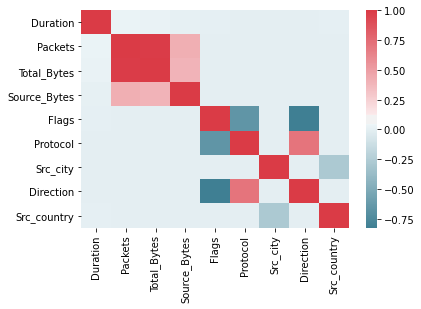

In [105]:

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

#### Bar Plots

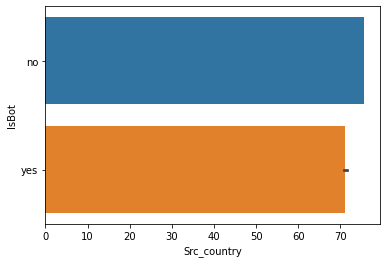

In [106]:
sns.barplot(x="Src_country",y="IsBot",data=new_df)
plt.show()

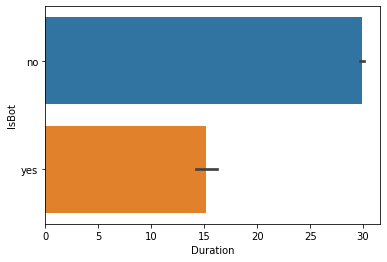

In [107]:
sns.barplot(x=final_X.Duration,y=Target['IsBot'],data=new_df)
plt.show()

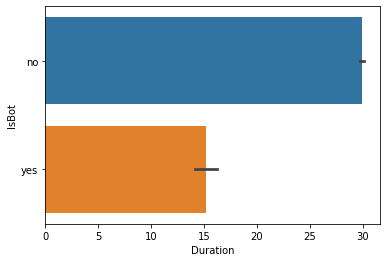

In [108]:
sns.barplot(x=final_X.Duration,y=Target['IsBot'],data=new_df)
plt.show()

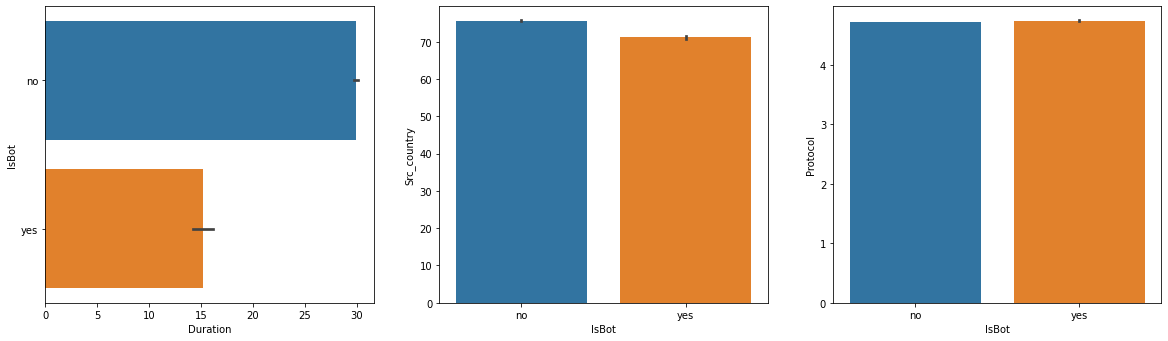

In [109]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x=final_X.Duration,y=Target['IsBot'],data=df)

plt.subplot(2,3,2)
sns.barplot(x=Target['IsBot'],y=final_X.Src_country,data=df)

plt.subplot(2,3,3)
sns.barplot(x=Target['IsBot'],y=final_X.Protocol,data=df)

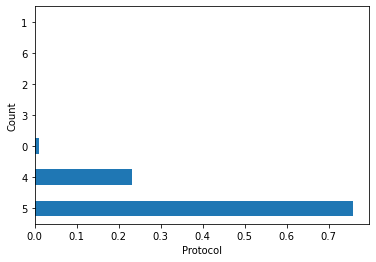

In [110]:
# Let's calculate the percentage of each country.
new_df.Protocol.value_counts(normalize=True)

#plot the bar graph of percentage job categories
new_df.Protocol.value_counts(normalize=True).plot.barh()
plt.xlabel('Protocol')
plt.ylabel('Count')


plt.show()

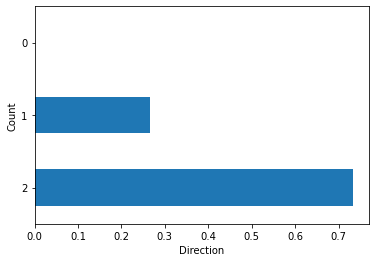

In [111]:
# Let's calculate the percentage of each country.
new_df.Direction.value_counts(normalize=True)

#plot the bar graph of percentage job categories
new_df.Direction.value_counts(normalize=True).plot.barh()
plt.xlabel('Direction')
plt.ylabel('Count')


plt.show()

#### Scatter Plots

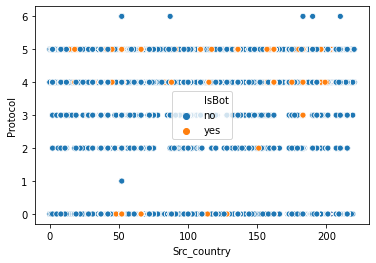

In [112]:
sns.scatterplot(x="Src_country",y="Protocol",data=new_df,hue="IsBot")
plt.show()

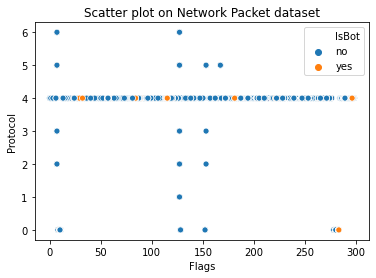

In [113]:
sns.scatterplot(x="Flags",y="Protocol",data=new_df,hue="IsBot")
plt.xlabel('Flags')
plt.ylabel('Protocol')
plt.title('Scatter plot on Network Packet dataset')
plt.show()

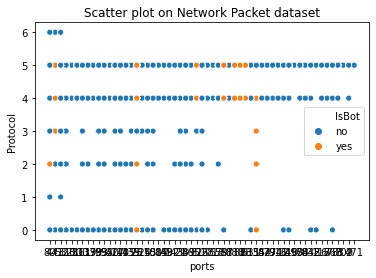

In [114]:
sns.scatterplot(x="ports",y="Protocol",data=new_df,hue="IsBot")
plt.xlabel('ports')
plt.ylabel('Protocol')
plt.title('Scatter plot on Network Packet dataset')
plt.show()

#### Pie Plots

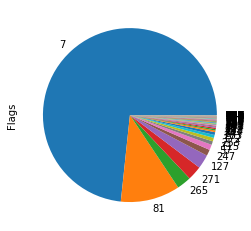

In [115]:
#calculate the percentage of each Flags
new_df.Flags.value_counts(normalize=True)

#plot the pie chart of education categories
new_df.Flags.value_counts(normalize=True).plot.pie()
plt.show()

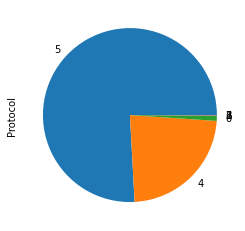

In [116]:
#calculate the percentage of each Flags
new_df.Protocol.value_counts(normalize=True)

#plot the pie chart of education categories
new_df.Protocol.value_counts(normalize=True).plot.pie()
plt.show()

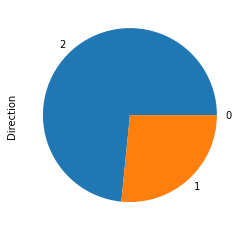

In [117]:
#calculate the percentage of each Flags
new_df.Direction.value_counts(normalize=True)

#plot the pie chart of education categories
new_df.Direction.value_counts(normalize=True).plot.pie()
plt.show()

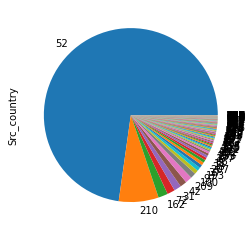

In [118]:
#calculate the percentage of each Flags
new_df.Src_country.value_counts(normalize=True)

#plot the pie chart of education categories
new_df.Src_country.value_counts(normalize=True).plot.pie()
plt.show()

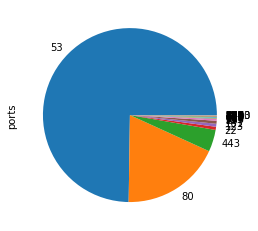

In [119]:
#calculate the percentage of each Flags
new_df.ports.value_counts(normalize=True)

#plot the pie chart of education categories
new_df.ports.value_counts(normalize=True).plot.pie()
plt.show()

#### Pair Plots

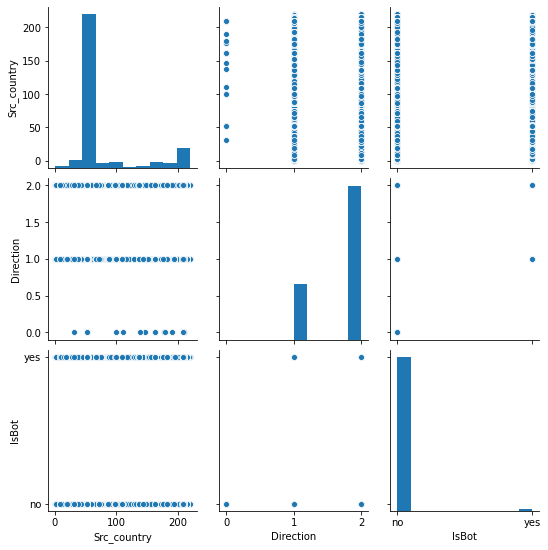

In [120]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = new_df, vars=['Src_country','Direction','IsBot'])
plt.show()

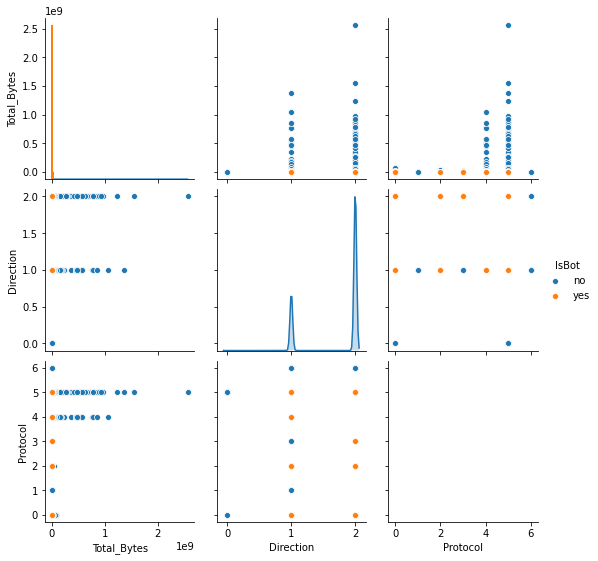

In [121]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = new_df, vars=['Total_Bytes','Direction','Protocol'],hue="IsBot")
plt.show()

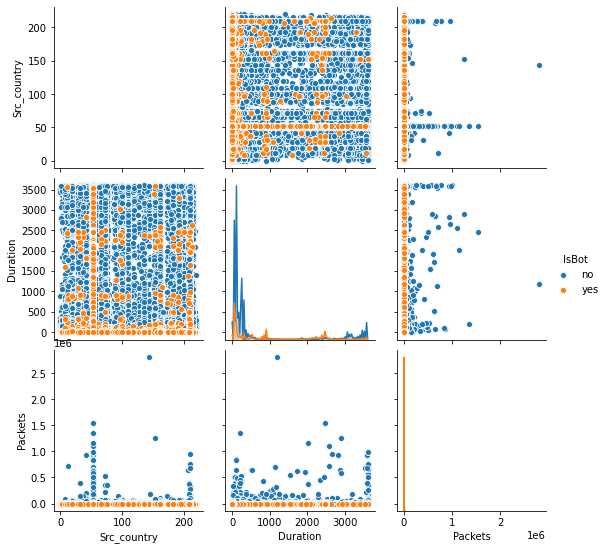

In [122]:
#plot the pair plot of Src_country, Duration and Packets in data dataframe.
sns.pairplot(data = new_df, vars=['Src_country','Duration','Packets'],hue="IsBot")
plt.show()

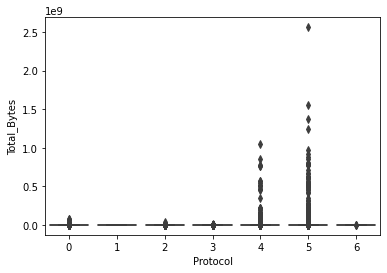

In [123]:
#plot the box plot of salary for yes & no responses.

sns.boxplot(new_df.Protocol, new_df.Total_Bytes)
plt.show()

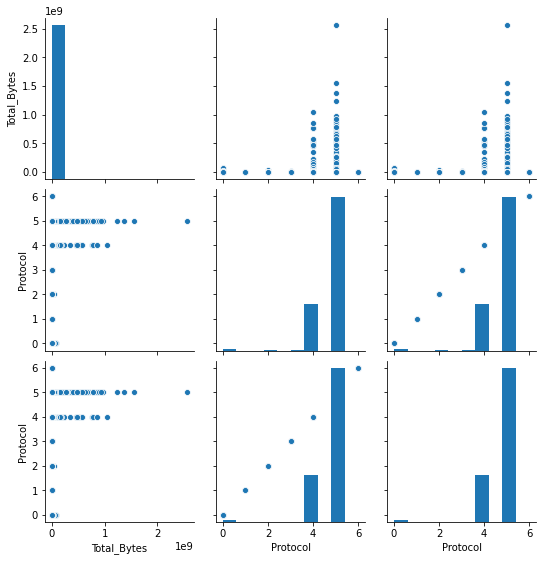

In [124]:
#plot the pair plot of Total_Bytes, Protocol and Protocol in data dataframe.
sns.pairplot(data = new_df, vars=['Total_Bytes','Protocol','Protocol'])
plt.show()

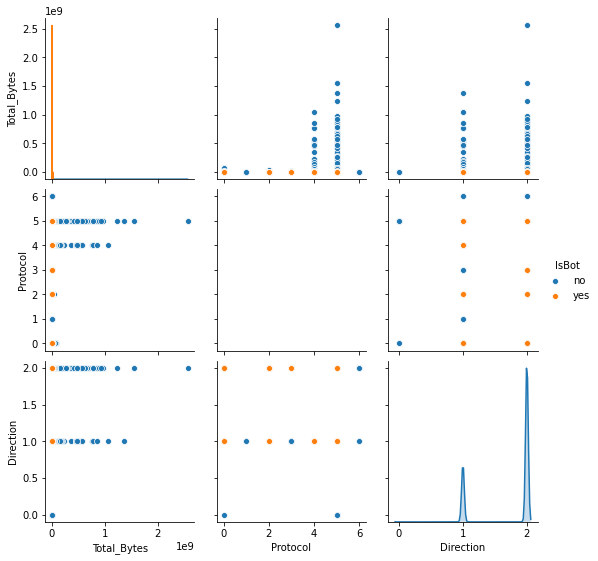

In [125]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = new_df, vars=['Total_Bytes','Protocol','Direction'],hue="IsBot")
plt.show()

### Step 8 : Downsampling

In [126]:
from sklearn.utils import resample
d = pd.merge(Target, final_X, right_index=True, left_index=True)
d.head()

Label IsBot     Source_IP Destination_IP    Duration  Packets  \
2   Background    no  147.32.86.89    77.75.73.33    3.056586        3   
3   Background    no  147.32.86.89    77.75.73.33    3.111769        3   
4   Background    no  147.32.86.89    77.75.73.33    3.083411        3   
5   Background    no  147.32.86.89    77.75.73.33    3.097288        3   
10  Background    no  147.32.84.59    147.32.80.7  328.361664        7   

    Total_Bytes  Source_Bytes ports  Flags  Protocol  Src_city  Direction  \
2           182           122    80    258         4     33347          1   
3           182           122    80    258         4     33347          1   
4           182           122    80    258         4     33347          1   
5           182           122    80    258         4     33347          1   
10          760           520    80    253         4     33347          1   

    Src_country  
2            52  
3            52  
4            52  
5            52  
10           52

In [127]:
d['IsBot'].value_counts()

no     7160689
yes      88224
Name: IsBot, dtype: int64

In [128]:
majo = d.loc[d['IsBot']=='no']
mino = d.loc[d['IsBot']=='yes']

In [129]:
# downsample majority class
maj_dsampled = resample(majo, 
                        replace=False,     # sample with replacement
                        n_samples=111776,  # to match minority class
                        random_state=1)    # reproducible results

In [130]:


dsampled = pd.concat([mino, maj_dsampled])
dsampled['IsBot'].value_counts()



no     111776
yes     88224
Name: IsBot, dtype: int64

### Step 9: Profiling in sampled data 

In [131]:
ProfileReport(dsampled)

### Step 9: Form the X and Y variable on downsampled dataset

#### X and Y variables

In [132]:
y=dsampled[['IsBot']]
X=dsampled.drop(['IsBot','Label','Source_IP','Destination_IP','Packets'],axis=1)

X

Duration  Total_Bytes  Source_Bytes ports  Flags  Protocol  \
675613    0.000278          203            64    53      7         5   
675948    0.020525          590            87    53      7         5   
675953    0.045125          882           629    80      7         5   
690001    0.336250          215            71    53      7         5   
691744    0.459301          212            77    53     81         4   
...            ...          ...           ...   ...    ...       ...   
10465396  0.000179          214            81    53      7         5   
3794901   0.000229          233            87    53      7         5   
6643804   0.000239          208            79    53      7         5   
12103678  0.000241          214            81    53     81         4   
1139964   0.000137          207            66    53      7         5   

          Src_city  Direction  Src_country  
675613       33347          2           52  
675948       33347          2           52  
675953       29110          2           66  
690001       33347          2           52  
691744       32094          1           31  
...            ...        ...          ...  
10465396     33347          2           52  
3794901      19085          2           66  
6643804      33347          2           52  
12103678      5610          1           97  
1139964      17740          2          100  

[200000 rows x 9 columns]

In [133]:
y

IsBot
675613     yes
675948     yes
675953     yes
690001     yes
691744     yes
...        ...
10465396    no
3794901     no
6643804     no
12103678    no
1139964     no

[200000 rows x 1 columns]

### Step 10: XGBoost Model buidling with 30% training/testing split data

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Test 1 at 30% Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=42)
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
scaler_minmax.fit(X_test)

X_train = scaler_minmax.transform(X_train)
X_test = scaler_minmax.transform(X_test)

In [135]:
#XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred = model.predict(X_test)
# replaced [round(value) for value in y_pred] with y_pred
predictions = y_pred     


### Step 11: Check Model Performance 

In [136]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",precision_score(y_test, y_pred, average="binary", pos_label="yes"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(y_test, y_pred, average="binary", pos_label="yes"))

Accuracy: 0.9584166666666667
Precision: 0.9540229885057471
Recall: 0.9508639719875162


In [137]:
# Accuracy on Training data
model.score(X_train, y_train)

0.9649214285714286

In [138]:
# Accuracy on Test data
model.score(X_test, y_test)

0.9584166666666667

In [139]:

from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,predictions)


array([[32522,  1204],
       [ 1291, 24983]], dtype=int64)

In [140]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n          no       0.96      0.96      0.96     33726\n         yes       0.95      0.95      0.95     26274\n\n    accuracy                           0.96     60000\n   macro avg       0.96      0.96      0.96     60000\nweighted avg       0.96      0.96      0.96     60000\n'

'               precision    recall  f1-score   support
no                 0.62      0.05      0.10      6130
yes                0.61      0.98      0.75      9204
accuracy           0.61     15334
macro avg          0.62      0.52      0.42     15334
weighted avg       0.61      0.61      0.49     15334'

In [141]:
tn, fp, fn, tp=confusion_matrix(y_test,y_pred).ravel()

In [142]:
#calculate False Alarm Rate 
far= fp / (tn+fp)
far

0.0356994603569946

### Step 12 : XGBoost Model buidling with 20% training/testing split data

In [143]:
# Test 2 at 20% Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=42)
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
scaler_minmax.fit(X_test)

X_train = scaler_minmax.transform(X_train)
X_test = scaler_minmax.transform(X_test)

In [144]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pred_2 = model.predict(X_test)
# replaced [round(value) for value in y_pred] with y_pred
predictions = y_pred_2     

In [145]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred_2))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",precision_score(y_test, y_pred_2, average="binary", pos_label="yes"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(y_test, y_pred_2, average="binary", pos_label="yes"))

Accuracy: 0.9587
Precision: 0.9529946068691456
Recall: 0.9532110612685254


In [146]:

tn, fp, fn, tp=confusion_matrix(y_test,y_pred_2).ravel()


In [147]:
#calculate False Alarm Rate 
far= fp / (tn+fp)
far

0.03698244673723704

### Step 13 : XGBoost Model buidling with 20% training/testing split data

In [148]:
# Test 3 at 10% Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1,random_state=42)
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(X_train)
scaler_minmax.fit(X_test)

X_train = scaler_minmax.transform(X_train)
X_test = scaler_minmax.transform(X_test)

In [149]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

# Fitting the model. 
model = XGBClassifier()
model.fit(X_train, y_train)

# Making predictions for the test data. 
y_pre_3 = model.predict(X_test)
# replaced [round(value) for value in y_pred] with y_pred
predictions = y_pred_3     

In [150]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred_3))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",precision_score(y_test, y_pred_3, average="binary", pos_label="yes"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(y_test, y_pred_3, average="binary", pos_label="yes"))

Accuracy: 0.9575
Precision: 0.9535256410256411
Recall: 0.9493959425575564


In [151]:

tn, fp, fn, tp=confusion_matrix(y_test,y_pred_3).ravel()
#calculate False Alarm Rate 
far= fp / (tn+fp)
far

0.03616604311419918